# 读取数据

In [1]:
import pandas as pd

df = pd.read_csv('data/pureMS2.csv')
df

,EN,CR,4+ IR,MSL,d,MorphoNo,SSA,M,CationNo,AnionNo,CD,Cs
0,1.96,1.39,0.71,2.56,5.89,4,64.80,2.0,1,1,1.0,431.82
1,1.96,1.39,0.71,2.56,5.89,4,64.80,2.0,1,1,2.0,398.88
2,1.96,1.39,0.71,2.56,5.89,4,64.80,2.0,1,1,3.0,312.18
3,1.96,1.39,0.71,2.56,5.89,4,64.80,2.0,1,1,5.0,272.00
4,1.96,1.39,0.71,2.56,5.89,4,64.80,2.0,1,1,7.0,230.70
...,...,...,...,...,...,...,...,...,...,...,...,...
240,2.16,1.30,0.65,2.41,6.15,2,6.64,1.0,2,2,0.6,85.40
241,2.16,1.30,0.65,2.41,6.15,2,6.64,1.0,2,2,0.7,75.30
242,2.16,1.30,0.65,2.41,6.15,2,6.64,1.0,2,2,1.0,34.60
243,2.16,1.30,0.65,2.41,6.15,4,58.20,2.0,1,1,1.0,116.80


# pearson相关系数

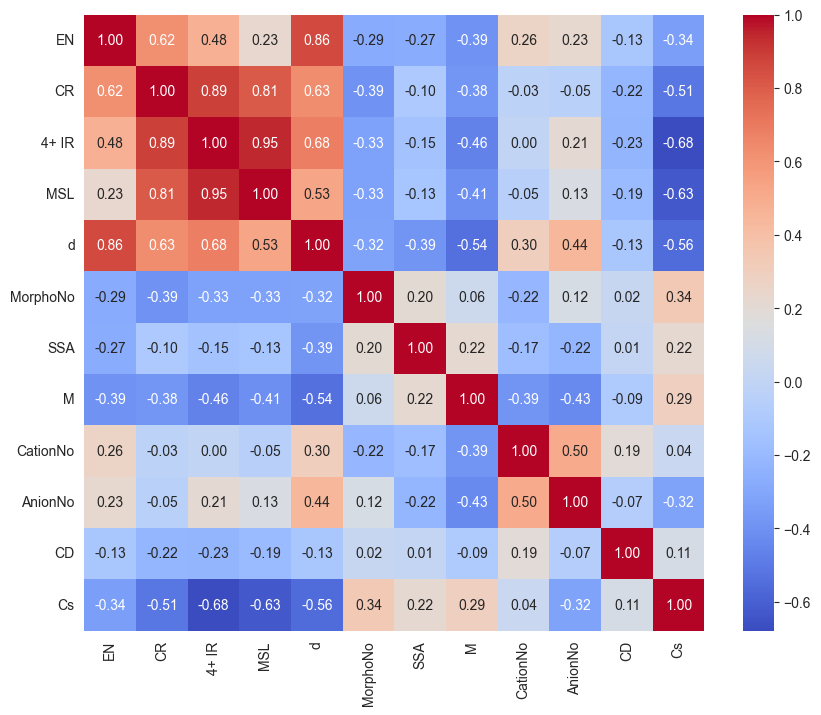

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_cor = df.drop(['MorphoNo', 'M', 'CationNo', 'AnionNo'], axis=1)
# Assuming df is already loaded as per the provided context
# Step 2: Compute the correlation matrix
correlation_matrix = df.corr()

# Step 3: (Optional) Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.savefig('output/figures/pearson_corr.png', dpi=300, bbox_inches='tight')

plt.show()

图中表明特征CR和D,IR和Lms有很强的相关性，因此我们可以删除其中一个特征。

In [5]:
df_1 = df.drop(['4+ IR', 'd', 'MSL'], axis=1)
df_1

,EN,CR,MorphoNo,SSA,M,CationNo,AnionNo,CD,Cs
0,1.96,1.39,4,64.80,2.0,1,1,1.0,431.82
1,1.96,1.39,4,64.80,2.0,1,1,2.0,398.88
2,1.96,1.39,4,64.80,2.0,1,1,3.0,312.18
3,1.96,1.39,4,64.80,2.0,1,1,5.0,272.00
4,1.96,1.39,4,64.80,2.0,1,1,7.0,230.70
...,...,...,...,...,...,...,...,...,...
240,2.16,1.30,2,6.64,1.0,2,2,0.6,85.40
241,2.16,1.30,2,6.64,1.0,2,2,0.7,75.30
242,2.16,1.30,2,6.64,1.0,2,2,1.0,34.60
243,2.16,1.30,4,58.20,2.0,1,1,1.0,116.80


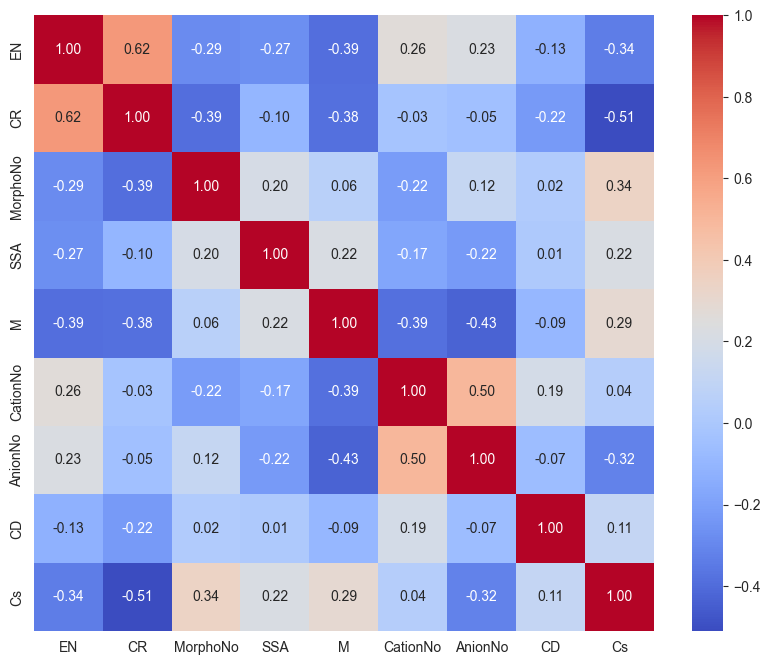

In [8]:
correlation_matrix = df_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.savefig('output/figures/pearson_corr_1.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
df_1.to_csv('data/pureMS2_pearson.csv', index=False)